In [1]:
import pandas as pd 

In [8]:
df = pd.read_csv('./news_df.csv', encoding='utf-8')
df.head()

,link,news
0,https://news.kbs.co.kr/news/view.do?ncd=552017...,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정
1,http://www.newsis.com/view/?id=NISX20220728_00...,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포"
2,https://biz.chosun.com/topics/topics_social/20...,"“귀신이 시켰다”… 부모 무참히 살해한 30대 여성, 구속송치"
3,https://www.ytn.co.kr/_ln/0103_202207290828459398,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치"
4,https://news.kmib.co.kr/article/view.asp?arcid...,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정"


In [12]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'news'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리
    news = re.sub('^\s+|\s+$|\s{2,}','',news) # 불필요한 공백들을 전부 제거

    okt = Okt()
    morph = okt.pos(news)
    noun_list = []
    for word, tag in morph:
        if (tag=='Noun') & (len(word) > 1):# 형용사 
            noun_list.append(word)
    noun_list= ' '.join(noun_list)
    
    df.loc[i,'news']= noun_list

In [13]:
df.head()

,link,news
0,https://news.kbs.co.kr/news/view.do?ncd=552017...,제주 중학생 살해 광석 김시 징역 확정
1,http://www.newsis.com/view/?id=NISX20220728_00...,이혼 요구 아내 살해 혐의 남성 현행범 체포
2,https://biz.chosun.com/topics/topics_social/20...,귀신 부모 무참 살해 여성 구속 송치
3,https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치
4,https://news.kmib.co.kr/article/view.asp?arcid...,제주 중학생 살해 광석 김시 징역 확정


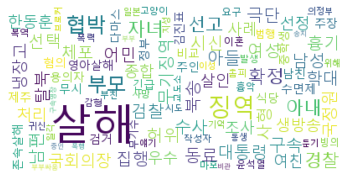

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['news'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
import collections
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nouns = ' '.join(df['news'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

noun_lst = Counter(nouns)
topnouns = noun_lst.most_common(50)
topnouns


#plt.bar(word_cloud_lst.keys(), word_cloud_lst.values())

[('살해', 936),
 ('징역', 146),
 ('협박', 99),
 ('부모', 88),
 ('자녀', 81),
 ('경찰', 73),
 ('아내', 71),
 ('선고', 69),
 ('확정', 68),
 ('극단', 64),
 ('선택', 64),
 ('흉기', 61),
 ('여성', 58),
 ('무기징역', 57),
 ('어민', 57),
 ('시신', 55),
 ('사형', 54),
 ('집행', 54),
 ('남편', 53),
 ('남성', 52),
 ('동료', 52),
 ('구속', 51),
 ('대통령', 51),
 ('수사', 49),
 ('탈북', 47),
 ('허위', 47),
 ('검찰', 46),
 ('북송', 46),
 ('아들', 46),
 ('체포', 43),
 ('국회의장', 41),
 ('냉장고', 40),
 ('학대', 38),
 ('국정원', 38),
 ('살인', 36),
 ('한동훈', 36),
 ('우수', 34),
 ('사례', 34),
 ('선정', 34),
 ('여친', 34),
 ('종합', 33),
 ('처리', 33),
 ('생방송', 33),
 ('조사', 32),
 ('영아살해', 32),
 ('혐의', 31),
 ('남친', 31),
 ('비교', 31),
 ('존속살해', 31),
 ('용의자', 31)]